In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

def ecdf(data):
    
    n = len(data)
    
    x = np.sort(data)
    y = np.arange(1,n+1)/n
    
    return x,y

def combination(n, r):
    
    if n - r == 0:
        return 1
    elif r == 0:
        return 1
    
    numerator = reduce(lambda x,y: x*y,range(n,1,-1))
    denominator = reduce(lambda x,y: x*y, range(r,0,-1))
    denominator *= reduce(lambda x,y:x*y, range(1, n-r+1)) 
    
    return numerator//(denominator)

    
def binomialDistribution(trials,outcomes,probability):
        
    combinations = combination(trials, outcomes)
    success_p = np.power(probability, outcomes)
    fail_p = np.power((1-probability), trials-outcomes)
    
    return combinations*success_p*fail_p

def cbdp(trials,outcomes,probability):
    
    total_probability = reduce(lambda x,y: x+binomialDistribution(trials,y,probability), range(1,outcomes+1))
    
    return total_probability


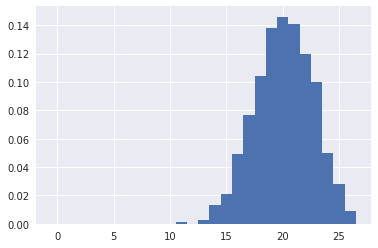

In [62]:
np.random.seed(42)
sns.set()
n_bloodletter_successes = np.random.binomial(30, 1-(2/6), size=1000)

bins = np.arange(0, max(n_bloodletter_successes)+1.5)-0.5

plt.hist(n_bloodletter_successes,normed=True, bins = bins)

plt.show()

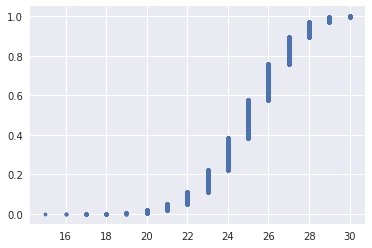

In [67]:
plt.clf()

x,y = ecdf(n_bloodletter_successes)
plt.plot(x,y, marker='.', linestyle='none')
plt.show()

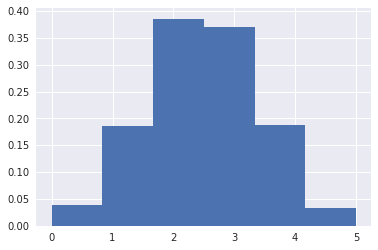

In [15]:
n_defaults = np.random.binomial(5,0.5,10000)
plt.clf()
plt.hist(n_defaults,normed=True,bins= 6)
plt.show()

In [17]:
binomialDistribution(30,30,1-(2/6))
print(cbdp(30,0,1-(2/6)))

TypeError: reduce() of empty sequence with no initial value